In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [2]:
test_dir = '/kaggle/input/malaria-detection-dataset/Dataset/Test'
train_dir = '/kaggle/input/malaria-detection-dataset/Dataset/Train'


In [18]:
# Image dimensions
IMG_HEIGHT, IMG_WIDTH = 150, 150

# Data augmentation and validation split for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Reserve 20% of the training data for validation
)

# Rescaling for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=16,
    class_mode='binary',
    subset='training'  # Specify this is the training subset
)

# Load validation data
val_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=16,
    class_mode='binary',
    subset='validation'  # Specify this is the validation subset
)

# Load test data (no split needed)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=16,
    class_mode='binary'
)


Found 333 images belonging to 2 classes.
Found 83 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [19]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
history = model.fit(
    train_data,
    epochs=20,
    validation_data=test_data
)


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 236ms/step - accuracy: 0.5658 - loss: 0.7417 - val_accuracy: 0.6791 - val_loss: 0.6831
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.6907 - loss: 0.6121 - val_accuracy: 0.3358 - val_loss: 0.8104
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.6820 - loss: 0.5635 - val_accuracy: 0.7537 - val_loss: 0.5772
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.7868 - loss: 0.5245 - val_accuracy: 0.7388 - val_loss: 0.4988
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.8131 - loss: 0.4105 - val_accuracy: 0.7537 - val_loss: 0.4742
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.8611 - loss: 0.3732 - val_accuracy: 0.8284 - val_loss: 0.4091
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9205 - loss: 0.2991 - val_accuracy: 0.8209 - val_loss: 0.3761
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.8771 - loss: 0.3217 - val_accuracy: 0.8507 - val_loss: 0

In [21]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification report and confusion matrix
y_true = test_data.classes
y_pred = model.predict(test_data).ravel()
y_pred = (y_pred > 0.5).astype(int)

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_data.class_indices.keys()))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7699 - loss: 0.6342
Test Accuracy: 0.76
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
Classification Report:
              precision    recall  f1-score   support

    Parasite       0.64      0.42      0.51        91
  Uninfected       0.29      0.51      0.37        43

    accuracy                           0.45       134
   macro avg       0.47      0.46      0.44       134
weighted avg       0.53      0.45      0.46       134

Confusion Matrix:
[[38 53]
 [21 22]]


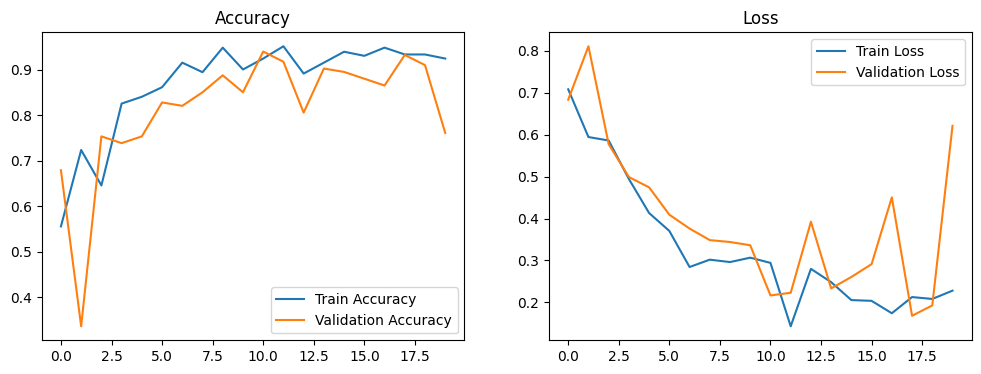

In [22]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [23]:
model.save('malaria_cnn_model.h5')
print("Model saved as 'malaria_cnn_model.h5'")

Model saved as 'malaria_cnn_model.h5'


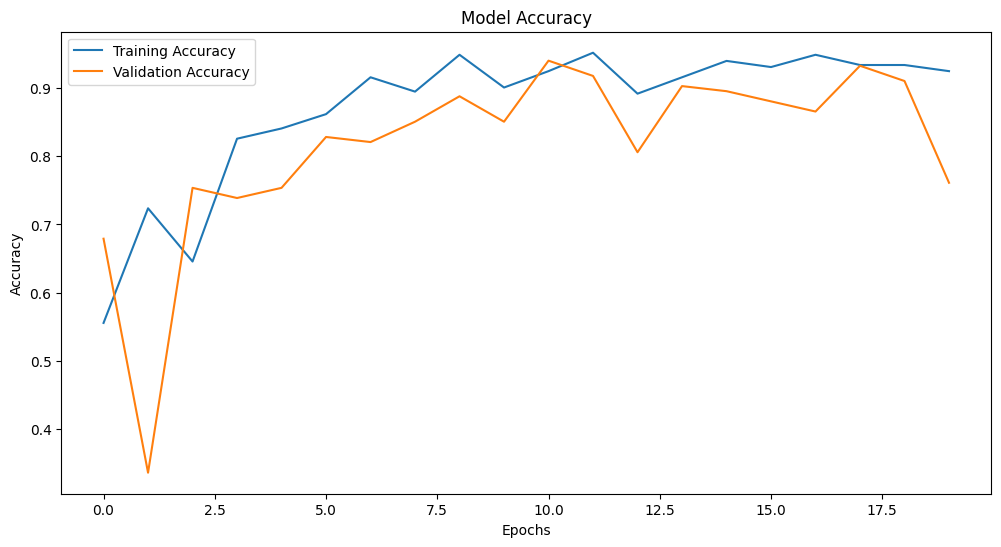

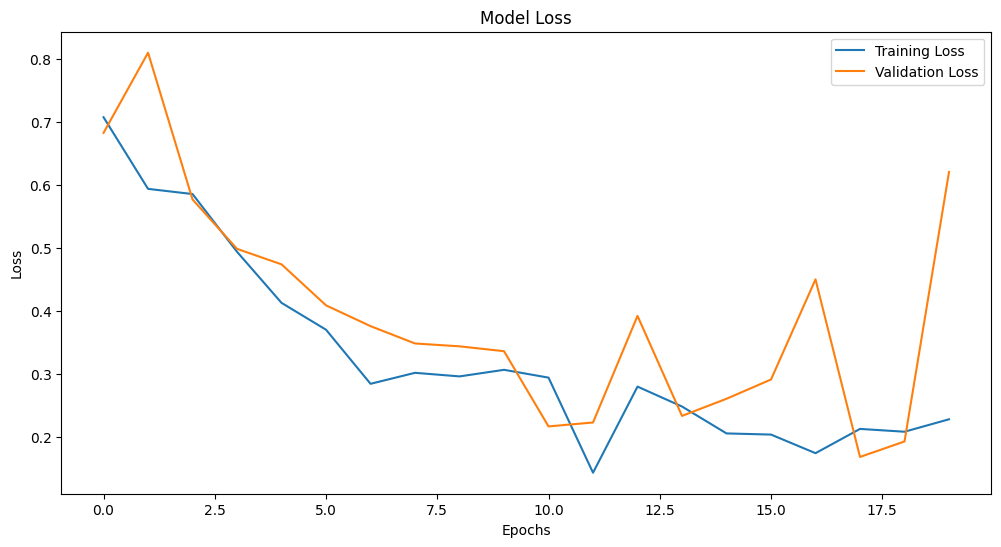

In [24]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


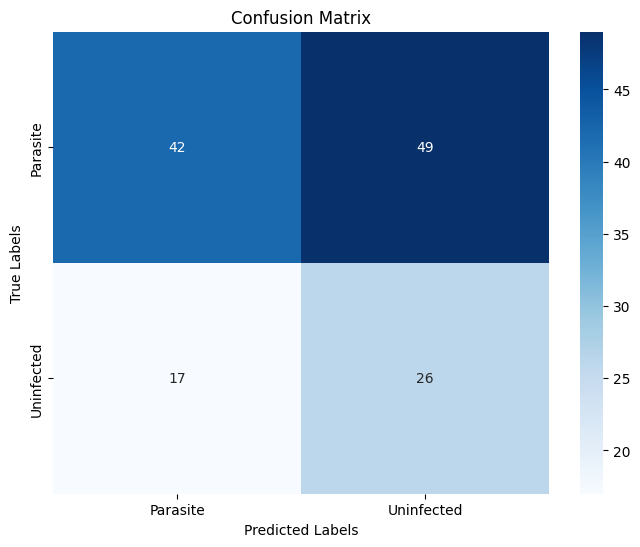

Classification Report:
              precision    recall  f1-score   support

    Parasite       0.71      0.46      0.56        91
  Uninfected       0.35      0.60      0.44        43

    accuracy                           0.51       134
   macro avg       0.53      0.53      0.50       134
weighted avg       0.59      0.51      0.52       134



In [25]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# Predict on test data
y_pred = model.predict(test_data).ravel()
y_pred_classes = (y_pred > 0.5).astype(int)

# Actual labels
y_true = test_data.classes

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_data.class_indices.keys(),
            yticklabels=test_data.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_data.class_indices.keys()))


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


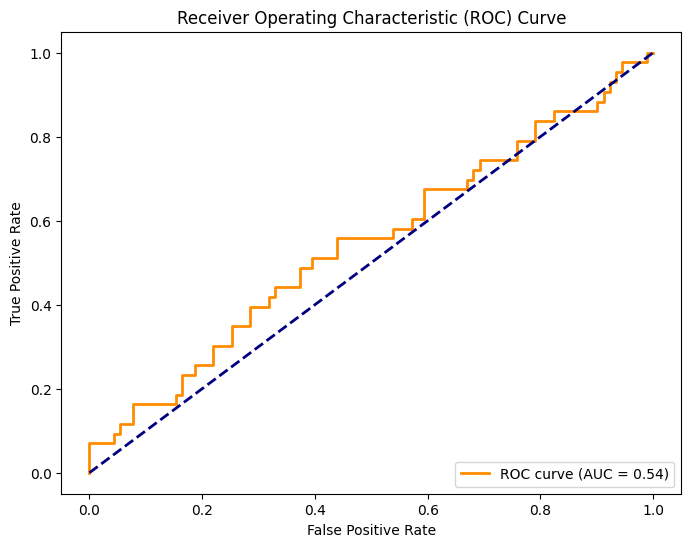

In [26]:
from sklearn.metrics import roc_curve, auc

# Get true labels and predicted probabilities
y_true = test_data.classes
y_pred_proba = model.predict(test_data).ravel()

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


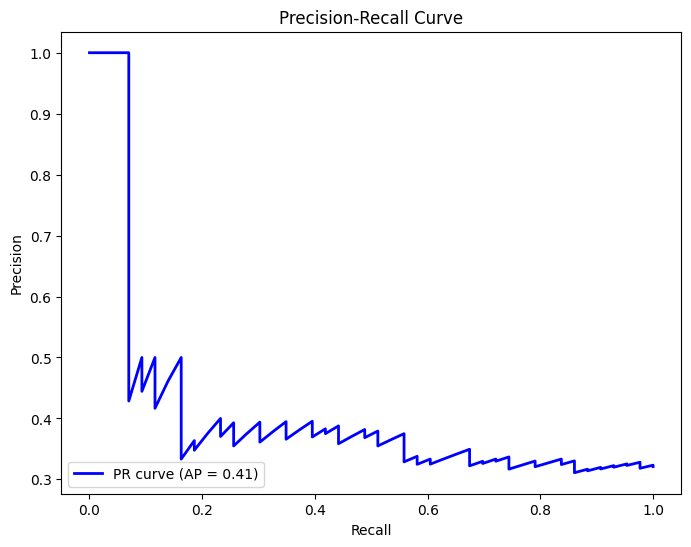

In [27]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_pred_proba)
average_precision = average_precision_score(y_true, y_pred_proba)

# Plot the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()
